In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mushrooms = pd.read_csv('mushrooms.csv')

In [2]:
#Displaying the dataframe 
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#displaying the columns 
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
#Starting the feature engineering and data cleaning 
#Checking for missing values
mushrooms.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [5]:
#Cell for replacing the binary values 


mushrooms['class'] = mushrooms['class'].replace(['p', 'e'], [0, 1]).infer_objects(copy=False)
mushrooms['bruises'] = mushrooms['bruises'].replace(['f', 't'], [0, 1]).infer_objects(copy=False)
mushrooms['gill-size'] = mushrooms['gill-size'].replace(['b', 'n'], [0, 1])
mushrooms['stalk-shape'] = mushrooms['stalk-shape'].replace(['e', 't'], [0, 1])
mushrooms['veil-type'] = mushrooms['veil-type'].replace(['p', 'u'], [0, 1])
mushrooms

/var/folders/dw/lzsq3drn39sd_d6nwl020_rw0000gn/T/ipykernel_8800/2280570702.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mushrooms['class'] = mushrooms['class'].replace(['p', 'e'], [0, 1]).infer_objects(copy=False)
/var/folders/dw/lzsq3drn39sd_d6nwl020_rw0000gn/T/ipykernel_8800/2280570702.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mushrooms['bruises'] = mushrooms['bruises'].replace(['f', 't'], [0, 1]).infer_objects(copy=False)
/var/folders/dw/lzsq3drn39sd_d6nwl020_rw0000gn/T/ipykernel_8800/2280570702.py:6: FutureWar

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,1,p,f,c,1,k,...,s,w,w,0,w,o,p,k,s,u
1,1,x,s,y,1,a,f,c,0,k,...,s,w,w,0,w,o,p,n,n,g
2,1,b,s,w,1,l,f,c,0,n,...,s,w,w,0,w,o,p,n,n,m
3,0,x,y,w,1,p,f,c,1,n,...,s,w,w,0,w,o,p,k,s,u
4,1,x,s,g,0,n,f,w,0,k,...,s,w,w,0,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,k,s,n,0,n,a,c,0,y,...,s,o,o,0,o,o,p,b,c,l
8120,1,x,s,n,0,n,a,c,0,y,...,s,o,o,0,n,o,p,b,v,l
8121,1,f,s,n,0,n,a,c,0,n,...,s,o,o,0,o,o,p,b,c,l
8122,0,k,y,n,0,y,f,c,1,b,...,k,w,w,0,w,o,e,w,v,l


In [6]:
#Cell for encoding the non binary values 

#Here we extract the columns with object datatype as they are the categorical columns
cat_columns = mushrooms.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(mushrooms[cat_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
cleanedMushrooms = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns))

# Add the one-hot encoded dataframe with the original dataframe
finalMushrooms = pd.concat([mushrooms, cleanedMushrooms], axis=1)
finalMushrooms = finalMushrooms.drop(cat_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{finalMushrooms}")

Encoded Employee data : 
      class  bruises  gill-size  stalk-shape  veil-type  cap-shape_b  \
0         0        1          1            0          0          0.0   
1         1        1          0            0          0          0.0   
2         1        1          0            0          0          1.0   
3         0        1          1            0          0          0.0   
4         1        0          0            1          0          0.0   
...     ...      ...        ...          ...        ...          ...   
8119      1        0          0            0          0          0.0   
8120      1        0          0            0          0          0.0   
8121      1        0          0            0          0          0.0   
8122      0        0          1            1          0          0.0   
8123      1        0          0            0          0          0.0   

      cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  ...  population_s  \
0             0.0          0.0 

In [7]:
finalMushrooms

,class,bruises,gill-size,stalk-shape,veil-type,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0,0,1,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
finalMushrooms.columns

Index(['class', 'bruises', 'gill-size', 'stalk-shape', 'veil-type',
       'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=115)

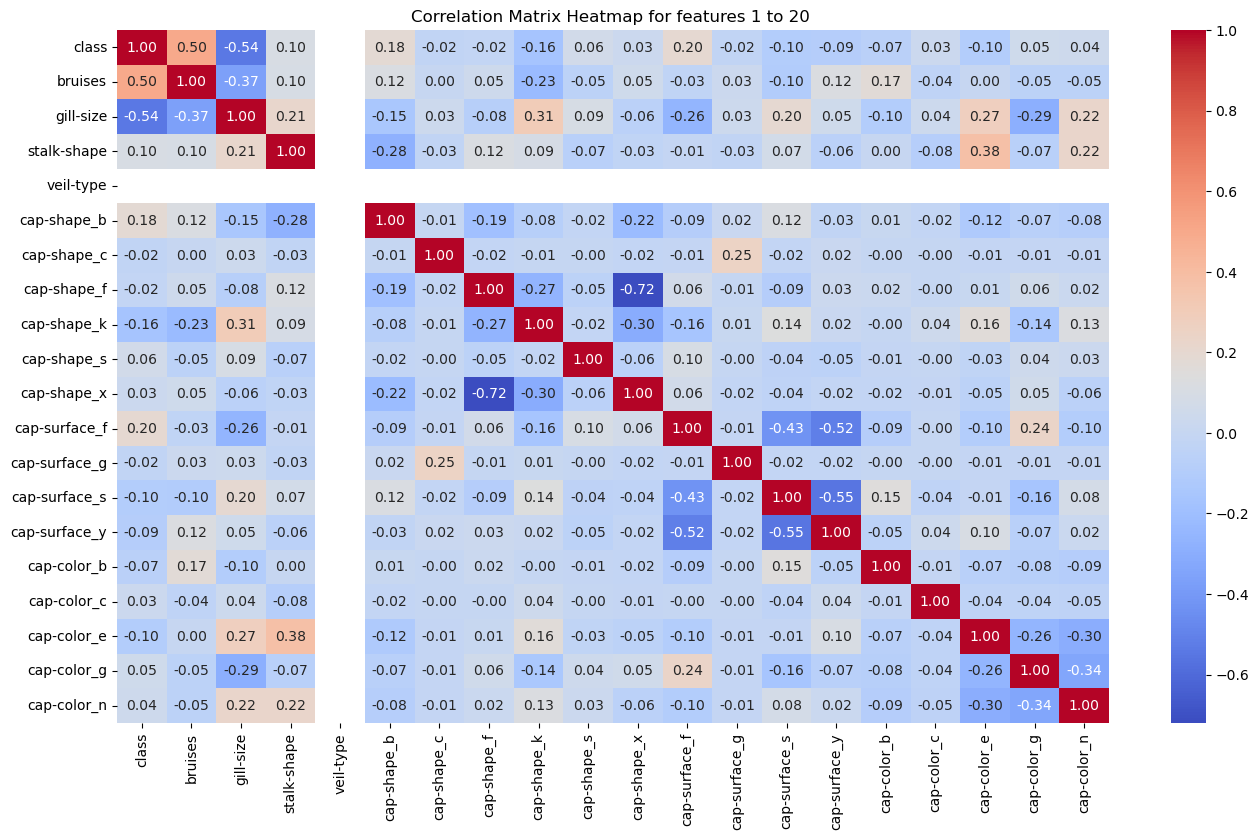

In [9]:
#Correlation Matrix 

selected_features = finalMushrooms.iloc[:, :20]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap for features 1 to 20 ')

# Show the plot
plt.show()

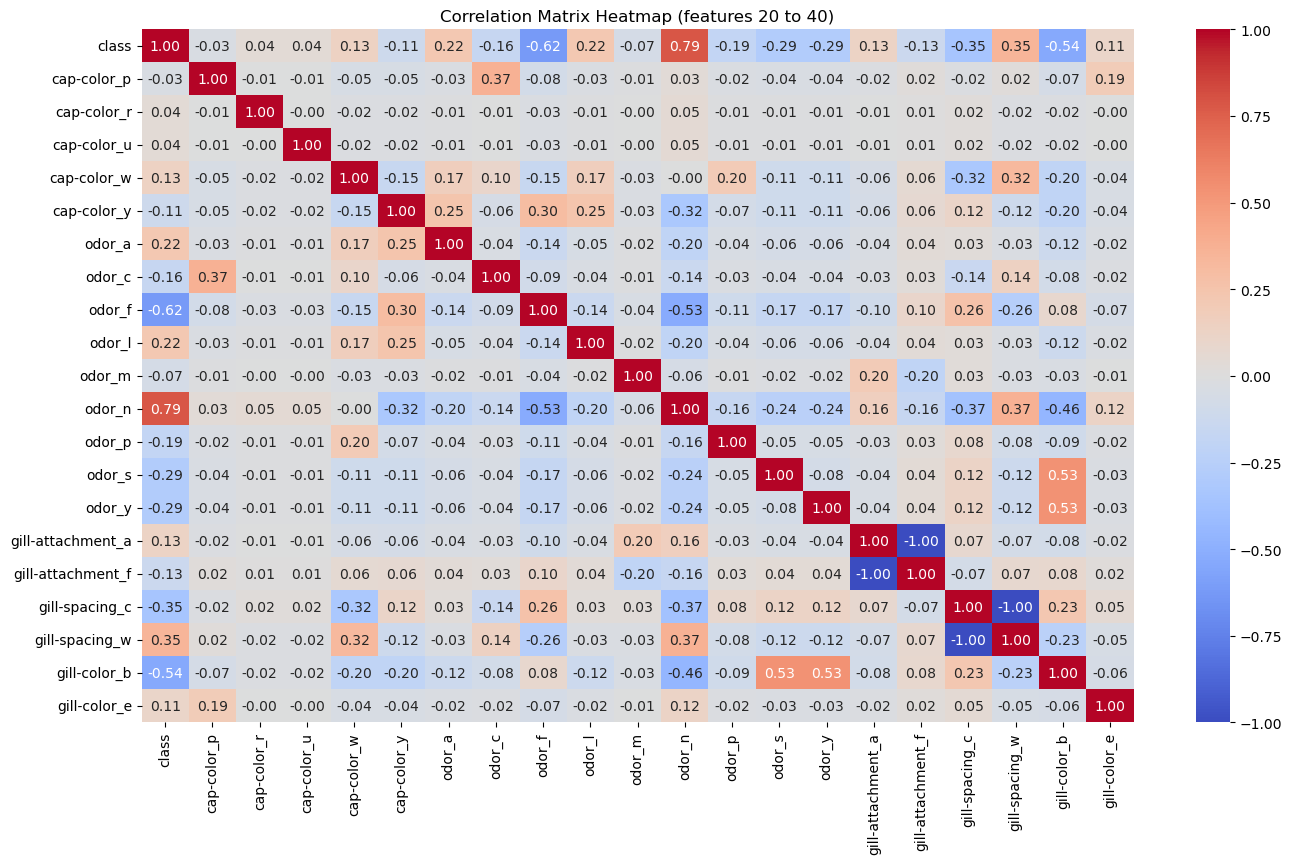

In [10]:

selected_features = finalMushrooms.iloc[:, 0:1]  # Include the first column
selected_features = pd.concat([selected_features, finalMushrooms.iloc[:, 20:40]], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (features 20 to 40)')

# Show the plot
plt.show()

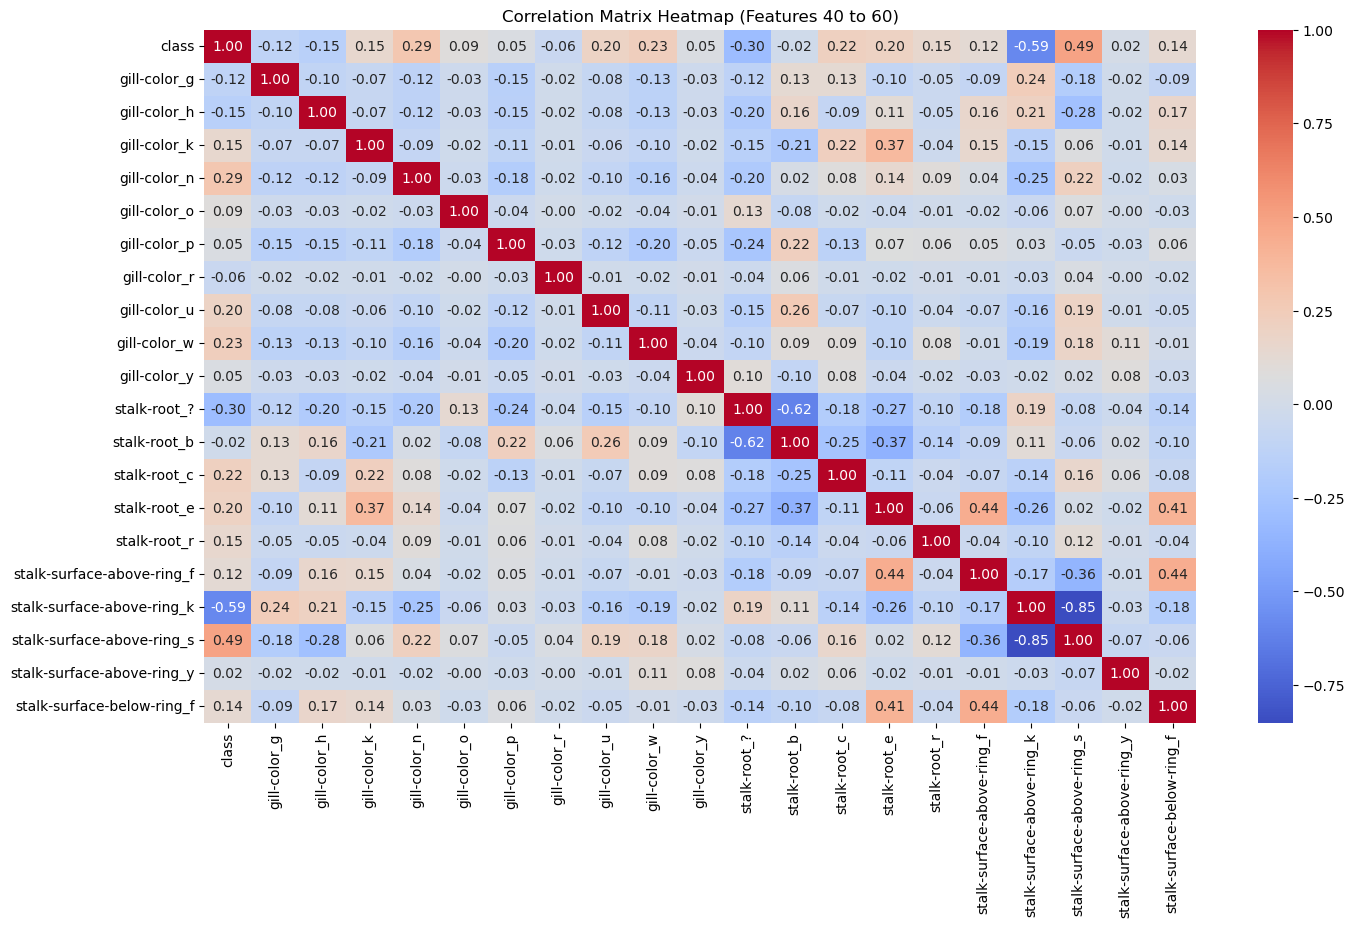

In [11]:

selected_features = finalMushrooms.iloc[:, 0:1]  # Include the first column
selected_features = pd.concat([selected_features, finalMushrooms.iloc[:, 40:60]], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (Features 40 to 60)')

# Show the plot
plt.show()

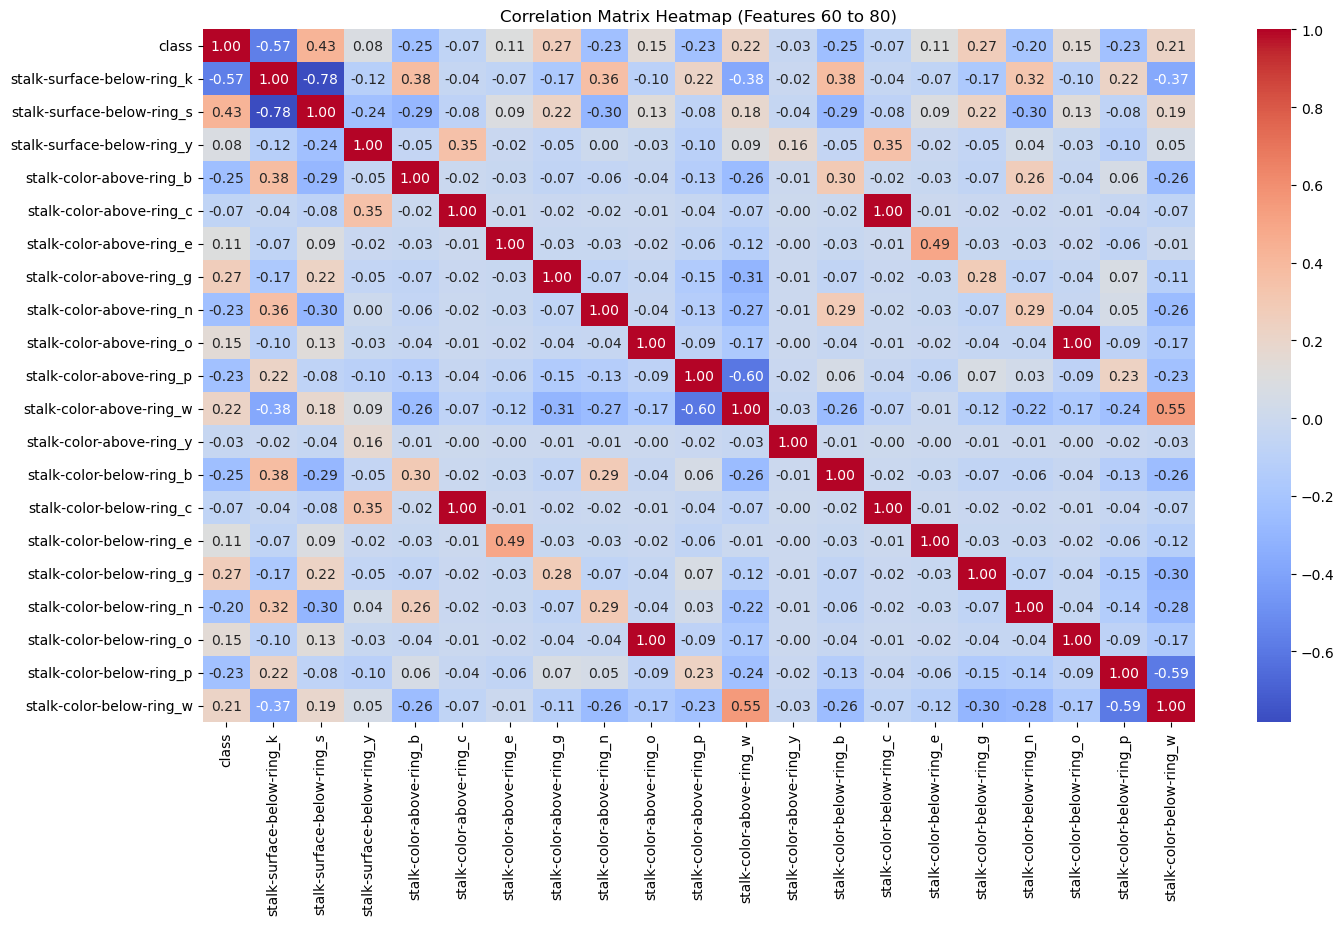

In [12]:

selected_features = finalMushrooms.iloc[:, 0:1]  # Include the first column
selected_features = pd.concat([selected_features, finalMushrooms.iloc[:, 60:80]], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (Features 60 to 80)')

# Show the plot
plt.show()

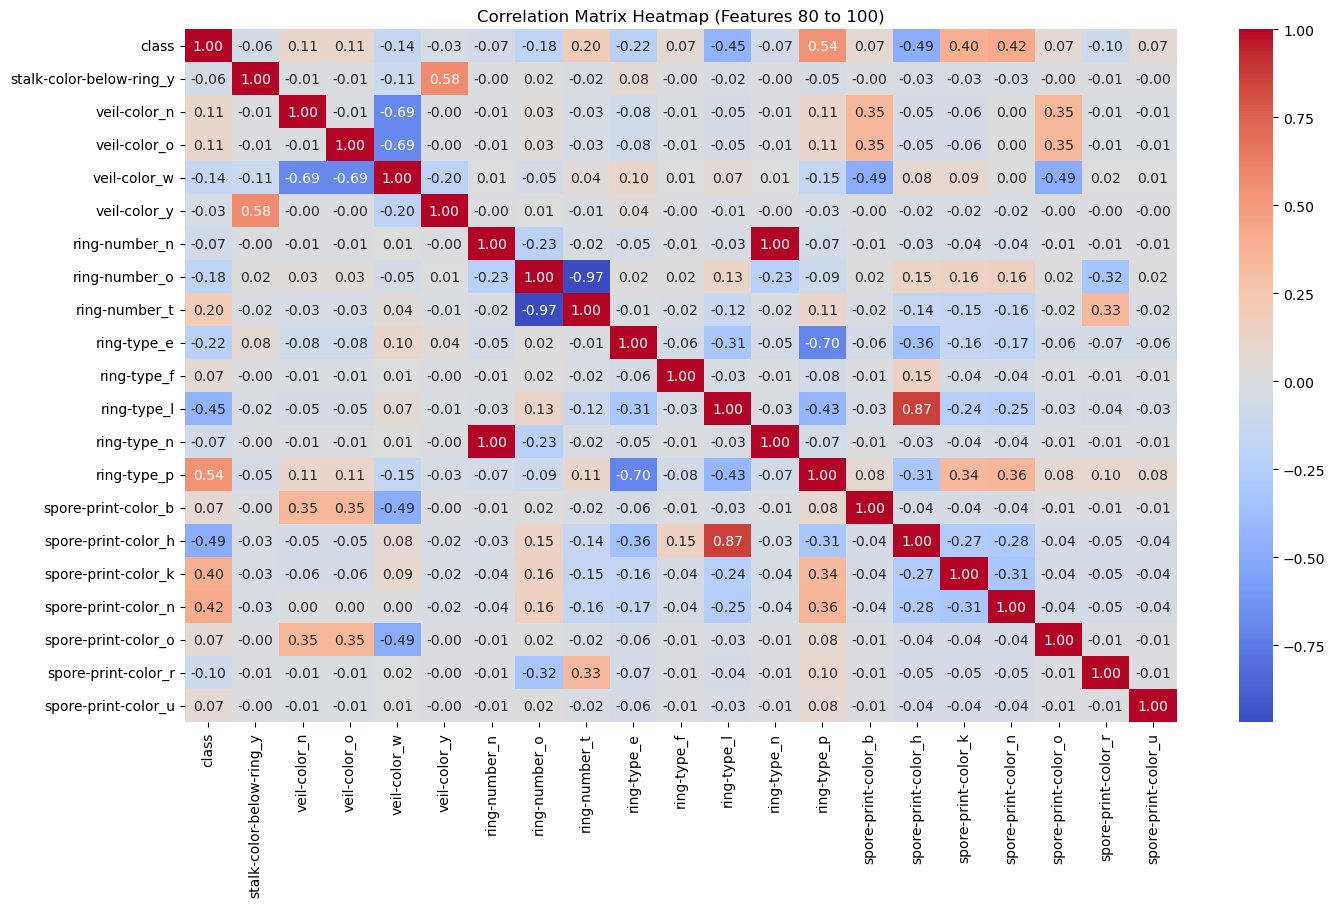

In [13]:

selected_features = finalMushrooms.iloc[:, 0:1]  # Include the first column
selected_features = pd.concat([selected_features, finalMushrooms.iloc[:, 80:100]], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (Features 80 to 100)')

# Show the plot
plt.show()

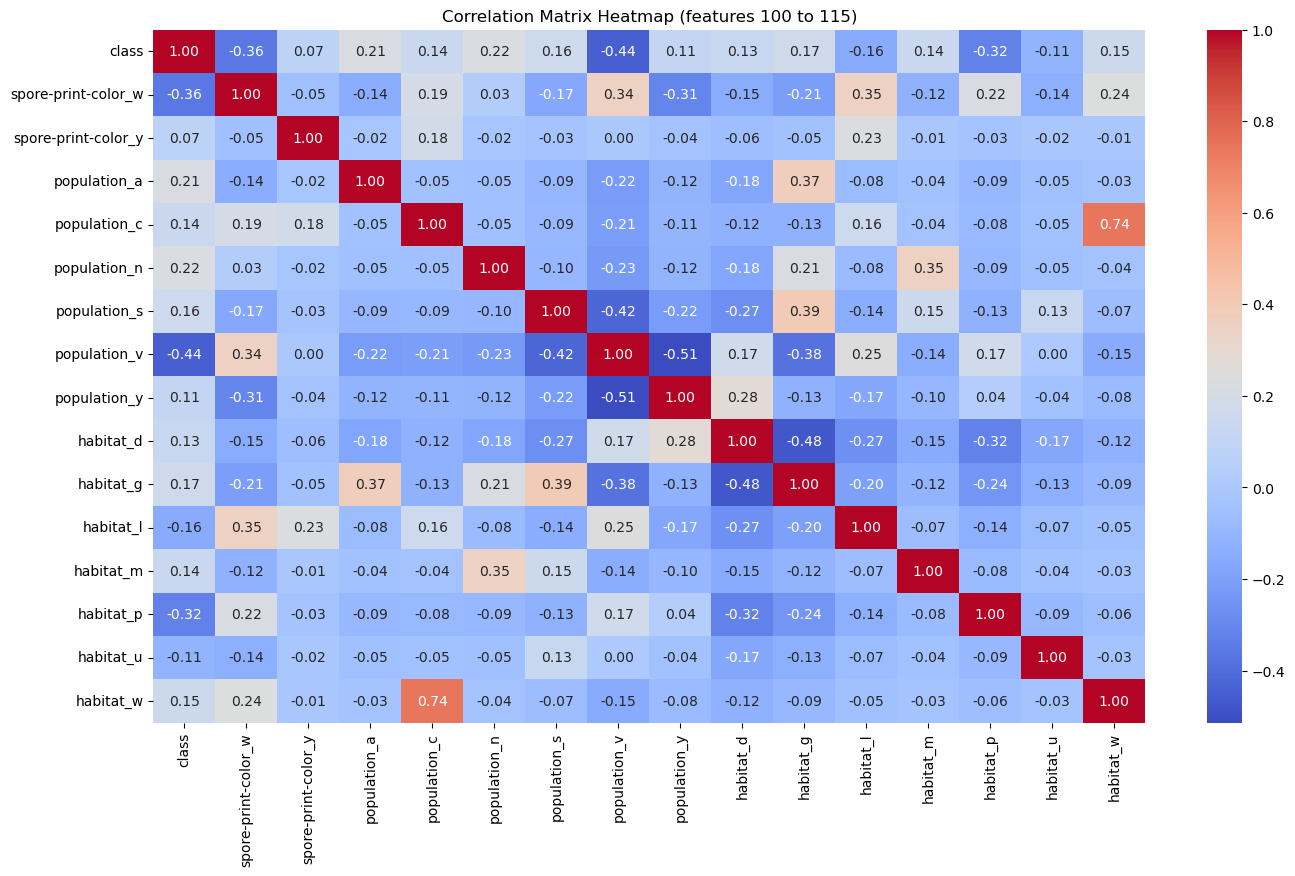

In [14]:
selected_features = finalMushrooms.iloc[:, 0:1]  # Include the first column
selected_features = pd.concat([selected_features, finalMushrooms.iloc[:, 100:115]], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (features 100 to 115)')

# Show the plot
plt.show()

In [15]:
#Correlation matrix with all the different values 

In [16]:
# make x and y for ml models 

#This would be using all the features but the class 
X = finalMushrooms.drop('class', axis=1) 

#Extracting class as the label 
y = finalMushrooms['class']  # Target variable

print('X and Y variables have been created')

X and Y variables have been created


In [17]:
#Creating test, training and validation data 

#20 percent test data size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#10 percent validation data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42) # 0.25 x 0.8 = 0.2

#This leaves 70 percent as training data 

print('Train, test and validation data have been created')

Train, test and validation data have been created


In [18]:
#Perform Pca on dataset 

#Standardizing the dataset 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and fit the dataset 
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)

print("Test data has been standardized with pca")

Test data has been standardized with pca


In [19]:
#LDA

ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train_scaled, y_train)

ldamodel.fit(X_val, y_val)

# Predict on the testing data
y_pred = ldamodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9993846153846154


In [20]:
#Cross validation for lda

ldamodel = LinearDiscriminantAnalysis()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(ldamodel, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.99938462 1.         0.99938462 0.99876847]
Mean accuracy: 0.9995075407351269


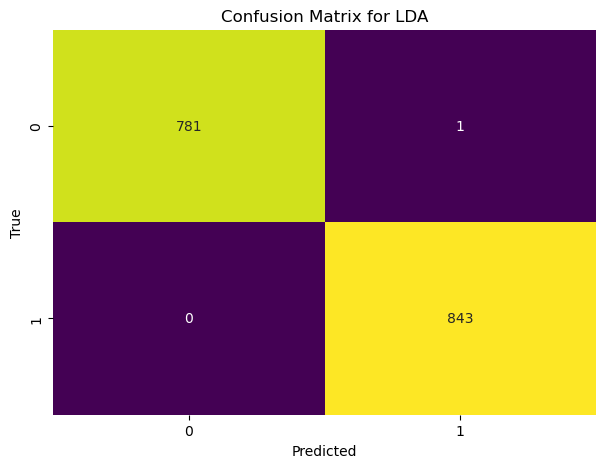

In [21]:
#Confusion matrix for LDA 

confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LDA")
plt.show()

In [22]:
#Logistic Regression 

logregmodel = LogisticRegression()
logregmodel.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logregmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9833846153846154


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
#Cross validation for logistic regression model 

logregmodel = LogisticRegression()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(logregmodel, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.99938462 1.         1.         0.99938424]
Mean accuracy: 0.9997537703675634


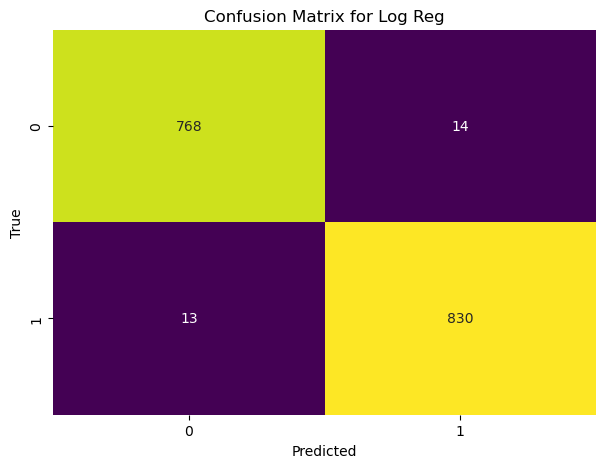

In [24]:
#Confusion matrix for Log Reg

confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Log Reg")
plt.show()

In [25]:
#Random Forest Classifier 

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = rfmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9858461538461538


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [26]:
rfmodel = RandomForestClassifier()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(rfmodel, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


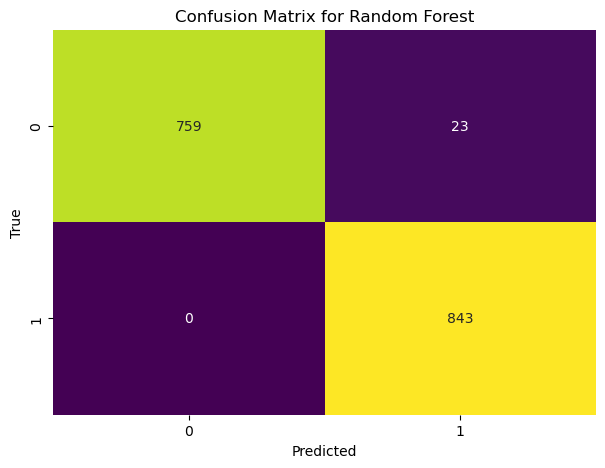

In [27]:
confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [28]:
#Predicting using all the features but the odor because those seem to be the most impactful on the dataset

# make x and y for ml models 

#This would be using all the features but the class 
X = finalMushrooms.drop(['class', 'odor_a','odor_c', 'odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y'], axis=1) 

#Extracting class as the label 
y = finalMushrooms['class']  # Target variable

print('X and Y variables have been created')

X and Y variables have been created


In [29]:
#Creating test, training and validation data 

#20 percent test data size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#10 percent validation data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42) # 0.25 x 0.8 = 0.2

#This leaves 70 percent as training data 

print('Train, test and validation data have been created')

Train, test and validation data have been created


In [30]:
#Perform Pca on dataset 

#Standardizing the dataset 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and fit the dataset 
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)

print("Test data has been standardized with pca")

Test data has been standardized with pca


In [31]:
#LDA

ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train_scaled, y_train)

ldamodel.fit(X_val, y_val)

# Predict on the testing data
y_pred = ldamodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9870769230769231


In [32]:
#Cross validation for lda

ldamodel1 = LinearDiscriminantAnalysis()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(ldamodel1, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.99938462 1.         0.99938462 0.99876847]
Mean accuracy: 0.9995075407351269


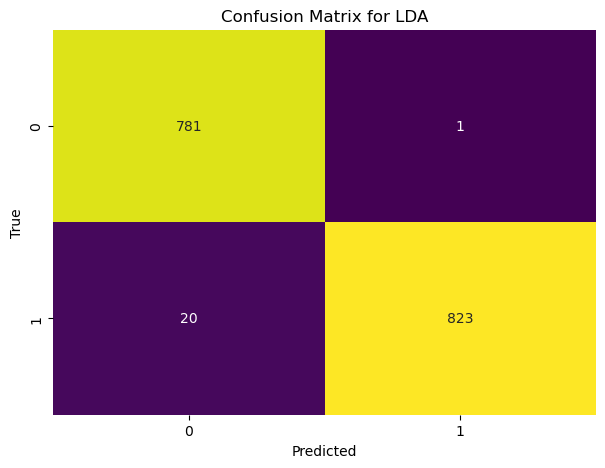

In [33]:
#Confusion matrix for LDA 

confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LDA")
plt.show()

In [44]:
#Logistic Regression 

logregmodel = LogisticRegression()
logregmodel.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logregmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9212307692307692


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [45]:
#Cross validation for logistic regression model 

logregmodel1 = LogisticRegression()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(logregmodel1, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.99876923 0.99815385 0.99876923 0.99815385 0.99753695]
Mean accuracy: 0.9982766199317924


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


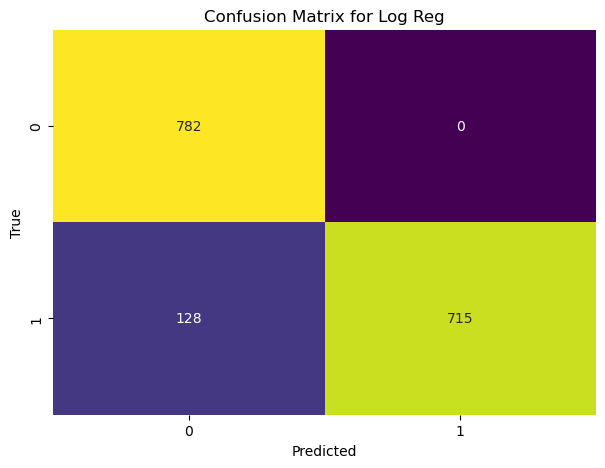

In [43]:
#Confusion matrix for Log Reg

confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Log Reg")
plt.show()

In [37]:
#Random Forest Classifier 

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = rfmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.992


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [38]:
#Cross validation for logistic regression model 

rfmodel = RandomForestClassifier()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object with the desired number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(logregmodel, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the mean accuracy of cross-validation
mean_accuracy = cross_val_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.99876923 0.99815385 0.99876923 0.99815385 0.99753695]
Mean accuracy: 0.9982766199317924


/Users/abhiyamm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


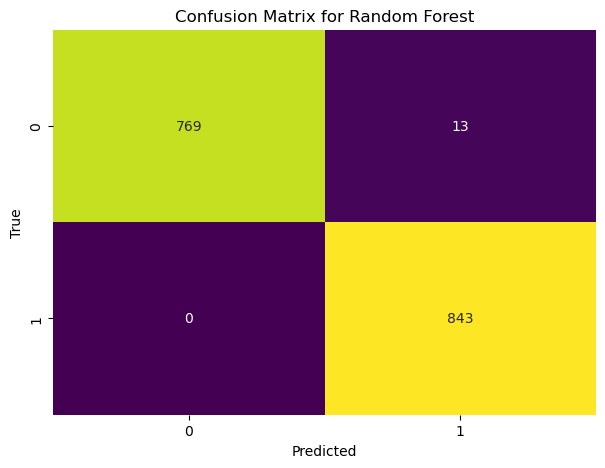

In [39]:
#Confusion matrix for Random Forest 

confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusionMatrix, annot=True, cmap = "viridis", fmt="d",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()